<a href="https://colab.research.google.com/github/kapuskaFaizan/ML-python-notebooks/blob/master/plant_village_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
loc = '/content/drive/My Drive/plantvillage_mini'

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense,Conv2D
import tensorflow as tf
from keras.applications import vgg16
from keras.models import Model
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


In [4]:
datadir =loc
catagories = ['Apple___Apple_scab','Apple___Cedar_apple_rust','Apple_Frogeye_Spot']

img_size = 150
training_data = []
def create_training_data():
    for category in catagories:
        path = os.path.join(datadir,category)
        classnum = catagories.index(category)
        for img in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path,img))
            new_arr = cv2.resize(img_arr,(img_size,img_size))
            training_data.append([new_arr,classnum])
            
create_training_data()
print(len(training_data))
random.shuffle(training_data)


1526


In [0]:

x=[]
y=[]
for feature , label in training_data:
    x.append(feature)
    y.append(label)

X = np.array(x).reshape(-1,img_size,img_size,3)#1 is for grayscale for bgr/rgb 3
X.shape

train_imgs_scaled = X.astype('float32')
train_imgs_scaled /= 255

batch_size = 30
num_classes = 5
epochs = 30
input_shape = (150, 150, 3)


vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

def get_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features



train_features_vgg = get_features(vgg_model, train_imgs_scaled)

input_shape = vgg_model.output_shape[1]
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(x=train_features_vgg, y=y,
                    validation_split=0.3,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


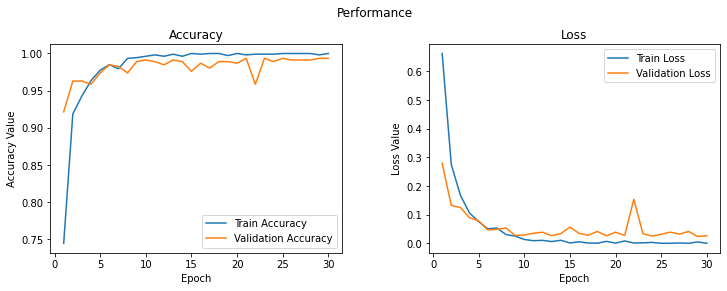

In [7]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [8]:
train_features_vgg = get_features(vgg_model, train_imgs_scaled)

input_shape = vgg_model.output_shape[1]
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(x=train_features_vgg, y=y,
                    validation_split=0.3,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1)

Train on 1068 samples, validate on 458 samples
Epoch 1/1
1068/1068 [==============================] - 2s 2ms/step - loss: 0.6330 - accuracy: 0.7500 - val_loss: 0.3209 - val_accuracy: 0.8996
